# StarryNight

## Team Members
- 902011, Moleri Andrea, a.moleri@campus.unimib.it
- 856114, Costantini Davide, d.costantini6@campus.unimib.it
- 865939, Armani Filippo, f.armani1@campus.unimib.it

## Description of the Reference Domain and Objectives

The StarryNight project aims to construct a star classification system utilizing machine learning techniques acquired during the course of the Machine Learning curriculum. The primary objective is to demonstrate that stars adhere to a discernible pattern, specifically referred to as the Hertzsprung-Russell Diagram or HR-Diagram. This diagram serves as the basis for classifying stars by plotting their features, providing valuable insights into their characteristics.

## Design Choices for Dataset Creation, Hypotheses, and Assumptions

[image](https://github.com/andreamoleri/StarryNight/blob/94a4b534ed5eeaec4191aca996eade09c72da697/Images/Spectral%20Class%20Diagram.png) 

In crafting the dataset, we assume that stars exhibit identifiable patterns in their features, allowing for meaningful classification. The HR-Diagram will be employed as the guiding framework for the classification system. The dataset will encompass a range of features crucial for classification:

- **Absolute Temperature**: the absolute temperature of a celestial body, denoted by the symbol $T$, is measured in Kelvin $(K)$. It represents the temperature of the body on the Kelvin scale, an absolute temperature scale where $0K$ corresponds to absolute zero, the theoretical lowest temperature possible. Absolute temperature is a fundamental parameter in astrophysics and is crucial for understanding the thermodynamic characteristics of celestial objects.

- **Relative Luminosity**: relative luminosity, expressed as $L/L_o$, denotes the ratio of a celestial body's luminosity $(L)$ to the solar luminosity $(L_o)$. Luminosity is the total amount of energy radiated by the object per unit time. This dimensionless quantity provides insights into the intrinsic brightness of a celestial body relative to the Sun, serving as a key metric for comparative stellar analyses.

- **Relative Radius**: the relative radius, denoted by $R/R_o$, represents the ratio of a celestial body's radius $(R)$ to the solar radius $(R_o)$. This dimensionless parameter is essential in characterizing the size of celestial bodies, facilitating the comparison of their physical dimensions relative to the Sun, which serves as a standard reference.

- **Absolute Magnitude**: absolute magnitude $(M_v)$ is a measure of the intrinsic brightness of a celestial object as it would appear if placed at a standard distance of 10 parsecs from an observer. This parameter is defined on the logarithmic scale, and its determination involves corrections for both distance and interstellar extinction. Absolute magnitude enables astronomers to assess the true luminosity of celestial bodies independent of their varying distances from Earth.

- **Star Color**: the term "Star Color" refers to the visual perception of a celestial object's hue as observed from Earth. This qualitative characteristic is attributed to the dominant wavelengths emitted by the star's surface. Common colors include white, red, blue, yellow, and yellow-orange. The analysis of star color provides valuable information about the temperature and composition of a star's outer layers.

- **Spectral Class**: spectral class categorizes stars based on their spectral characteristics, primarily determined by the temperature of their surfaces. The spectral sequence, from hottest to coolest, is denoted by the letters $O, B, A, F, G, K$, and $M$. This classification system aids astronomers in classifying stars and understanding their fundamental properties, such as temperature, luminosity, and chemical composition.

- **Star Type**: star type refers to the broader categorization of celestial objects based on their evolutionary stage and physical characteristics. This classification includes Red Dwarfs, which are low-mass and long-lived stars; Brown Dwarfs, substellar objects not massive enough to sustain nuclear fusion; White Dwarfs, remnants of low to medium-mass stars; Main Sequence stars, like our Sun, undergoing hydrogen fusion; SuperGiants, massive and luminous stars; and HyperGiants, the most massive and intrinsically bright stars in the stellar hierarchy. Understanding star types is crucial for comprehending the diverse life cycles of stars in the cosmos.

The designated target for our classification endeavors will be the **Star Type**. The following definitions apply:

- $Lo = 3.828 * 10^{26}~Watts$ _(Average Luminosity of the Sun)_
- $Ro = 6.9551 * 10^{8}~m$ _(Average Radius of the Sun)_

## Data Formatting and Analysis

Let's star by running the code snippet below, that is needed in order to import all the necessary dependencies for the project.

In [11]:
# Importing the necessary dependencies
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

What follows is the preliminary formatting of the dataset, that ensures that all the considered instances have correct and well-formatted values. 

In [12]:
# Reading the dataset from a CSV file
df = pd.read_csv("StarsDataset.csv")

# Converting each color to uppercase for consistency, removing leading and 
# trailing whitespaces, and replacing spaces with hyphens to ensure uniformity
df["Star color"] = [color.upper().strip().replace(" ", "-") for color in df["Star color"]]

We then move on to Principal Component Analysis, starting with Variance Analysis

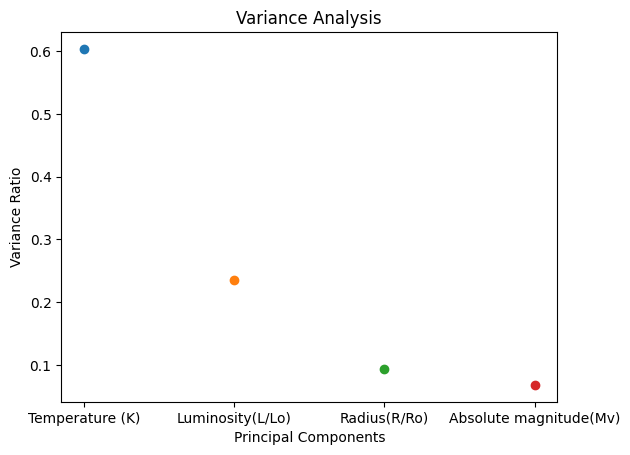

In [13]:
# Selecting attributes for analysis, assuming the first four columns of the DataFrame
attributes = list(df.columns[:4])

# Standardizing the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[attributes])

# Applying Principal Component Analysis (PCA) on the scaled data
pca = PCA().fit(scaled_data)

# Plotting the explained variance ratios for each principal component
for i in range(pca.n_components_):
    plt.plot(attributes[i], pca.explained_variance_ratio_[i], marker='o')

# Adding labels and title to the plot
plt.xlabel("Principal Components")
plt.ylabel("Variance Ratio")
plt.title("Variance Analysis")

# Displaying the plot
plt.show()

### Variance Analysis Considerations 
- **Temperature $(K)$:** a Variance Ratio of approximately $0.6$ indicates a moderate variance compared to the reference population. This may suggest that stellar temperatures in the dataset are relatively homogeneous, but there are still significant differences.
- **Luminosity $(L/Lo)$:** a Variance Ratio of approximately $0.2$ indicates lower variance compared to temperatures, but it is still present. The luminosities of stars in the dataset appear to be more homogeneous compared to temperatures.
- **Radius $(R/Ro)$:** a Variance Ratio of about $0.1$ suggests low variance compared to the reference population for stellar radius. This may indicate that the radius of stars in the dataset are relatively similar to each other.
- **Absolute Magnitude $(Mv)$:** a Variance Ratio of approximately $0.05$ indicates very low variance compared to the reference population for absolute magnitude. This suggests that absolute magnitudes of stars in the dataset are very similar to each other.
